
# Project 1: Digit Classification with KNN


# Intro
---
In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. 
As always, you're welcome to work on the project in groups and discuss ideas over Slack, but <b> please prepare your own write-up (with your own code). </b> To be safe, please credit any sources used.


## Grading
---
 - Make sure to answer every part in every question.
 - There are 5 questions, each worth an equal number of points.
 - Read carefully what is asked including the notes.
 - Additional points may be deducted if:
   - the code is not clean or is not well commented
   - the functions or answers are excessively long

## Requirements:
---
1. Comment your code.
1. Each graph should have a title, labels for each axis, and (if needed) a legend. Each graph should be understandable on its own.
1. All code must run on colab.research.google.com
1. You should not import any additional libraries.
1. Try and minimize the use of the global namespace (meaning, keep things inside functions).

## Additional reading and notes
---

If you are looking to get started with Tensorflow, you can read through this tutorial: https://www.tensorflow.org/tutorials/keras/classification. It uses a dataset called "fashion_mnist", which is identical in structure to the original digit mnist, but uses images of clothing rather than images of digits. The number of training examples and number of labels is the same. In fact, you can simply replace the code that loads "fashion_mnist" with "mnist" and everything should work fine.

Additionally, if you're interested, check out these links related to digit recognition:

* Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/
* Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

In [2]:
import sklearn
sklearn.__version__

'0.24.1'

Load the data. Notice that the data gets partitioned into training, development, and test sets. Also, a small subset of the training data called mini_train_data and mini_train_labels gets defined, which you should use in all the experiments below, unless otherwise noted.

In [3]:
# Load the digit data from https://www.openml.org/d/554 or from default local location '~/scikit_learn_data/...'
X, Y = fetch_openml(name='mnist_784', return_X_y=True, cache=False, as_frame=False)

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


### Question 1: Visualize a select sample of images
---
Show a 10x10 grid that visualizes 10 examples of each digit.

Notes:
* Make the digits nice and big.
* You can use `plt.rc()` for setting the colormap, for example to black and white.
* You can use `plt.subplot()` for creating subplots.
* You can use `plt.imshow()` for rendering a matrix.
* You can use `np.array.reshape()` for reshaping a 1D feature vector into a 2D matrix (for rendering).

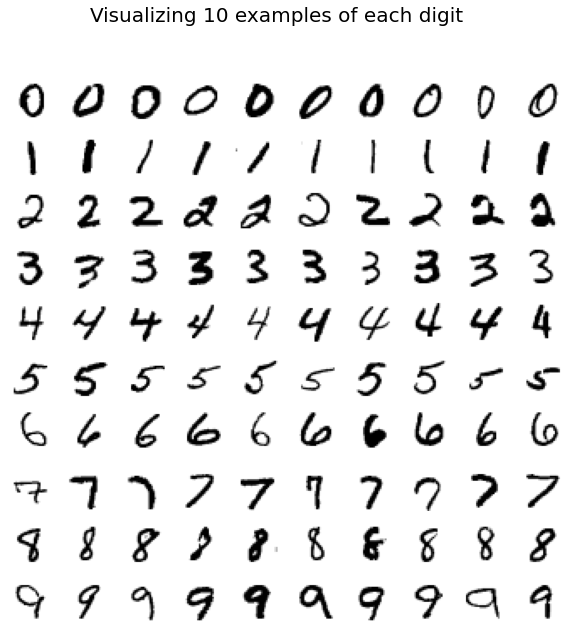

In [4]:
def Q1(num_examples=10):
  ### STUDENT START ###

   #initializing a plot
    fig = plt.figure(figsize= (10,10))
    fig.suptitle('Visualizing 10 examples of each digit', fontsize = 20)
    
    #starting from 1 and goint all way to 100
    count = 1 
    
    #loop through a range of num_examples
    for i in range(num_examples):
        
        #create a new row and loop through 0 to 10
        for j in range(10):
            
            #locatej'th positions and correspond to i'th position in train_labels
            position_i_j = np.argwhere(train_labels== str(i))[j]
            
            #reshaping
            my_plot = np.reshape(train_data[position_i_j], (28,28))
            
            #adding to the 10 X numb_examples grid
            final_plot = fig.add_subplot(num_examples, 10, count)
            
            #turning off axis for individual subplots
            final_plot.set_axis_off()
            
            #adding to count 1 
            count = count + 1
            
            #rendering matrix
            final_plot.imshow(my_plot, cmap = 'gray_r')

  ### STUDENT END ###

Q1(10)

### Question 2: Evaluating different choices of k
---

1. Produce k-Nearest Neighbors models with k = 1, 3, 5, 7, and 9.  
1. Print the accuracy of each model. 
1. Additionally, only for the 1-Nearest Neighbor model, show the precision, recall, and F1 for each label. 
1. Which digit is the most *difficult* for the 1-Nearest Neighbor model to classify correctly? How did you choose and why?

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* Print only the information asked so it is easy to read and compare.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `classification_report` to get precision, recall, and F1 results.
* Check out what the function "score" does.

In [5]:
def Q2(k_values):

### STUDENT START ###

    #starting a list
    accuracies = []
    
    #iterating through the k_values' list
    for k in k_values:
        
        #using KNeighborsClassifier to produce a k-nearest neighbor model
        knn_model = KNeighborsClassifier(k)
        
        #fitting the model to our dev data set and giving it a score on the dev data set. 
        knn_model.fit(mini_train_data, mini_train_labels)
        knn_score = knn_model.score(dev_data, dev_labels)
        
        #finding precision, recall and f-1 for k = 1
        if k == 1:
            predictions = knn_model.predict(dev_data)
            print("Report for k = 1: ")
            print(classification_report(dev_labels, predictions))
            
        print("k = {}: Accuracies: {:.3f}%".format(k, knn_score))
        accuracies.append(knn_score)
        
    
### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
Q2(k_values)

Report for k = 1: 
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       106
           1       0.89      0.98      0.93       118
           2       0.90      0.79      0.84       106
           3       0.93      0.87      0.90        97
           4       0.91      0.85      0.88        92
           5       0.86      0.88      0.87        88
           6       0.92      0.92      0.92       102
           7       0.85      0.94      0.89       102
           8       0.83      0.77      0.80        94
           9       0.80      0.86      0.83        95

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.89      0.88      0.88      1000

k = 1: Accuracies: 0.884%
k = 3: Accuracies: 0.876%
k = 5: Accuracies: 0.882%
k = 7: Accuracies: 0.877%
k = 9: Accuracies: 0.875%


Answer to part 4: Digit 9 seems to be the most difficult digit with the lowest f1-score of 0.79. The reason that I chose f-1 score to determine the most difficult digit is because f1-score in a way combines precision and recall and is defined as the harmonic mean of the model's precision and recall. Generally, the highe the f-1 score of a model, the better. 

### Question 3: Examining the importance of training size
---
1. Produce 1-Nearest Neighbor models using training data of various sizes. For example, ```train_data[:train_size]```.
1. Evaluate and show the accuracy achieved by each model.  
1. Show the time needed to: 
  1. Train each model.
  1. Measure the accuracy of each model.
1. What do you see? Is this what you expected to see and why?
1. Plot on the same graph (as a function of training size):
  1. the time needed for training
  1. the time needed for calculating accuracy

Notes:
* Evaluate on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `time.time()` to measure elapsed time of operations.

Train Size: 100, Accuracy: 0.702, Train Time (secs): 0.03499889373779297
Train Size: 200, Accuracy: 0.791, Train Time (secs): 0.04700112342834473
Train Size: 400, Accuracy: 0.811, Train Time (secs): 0.03597259521484375
Train Size: 800, Accuracy: 0.866, Train Time (secs): 0.05499887466430664
Train Size: 1600, Accuracy: 0.905, Train Time (secs): 0.07514381408691406
Train Size: 3200, Accuracy: 0.927, Train Time (secs): 0.13897061347961426
Train Size: 6400, Accuracy: 0.939, Train Time (secs): 0.27497339248657227
Train Size: 12800, Accuracy: 0.952, Train Time (secs): 0.5391154289245605
Train Size: 25600, Accuracy: 0.963, Train Time (secs): 0.7842364311218262


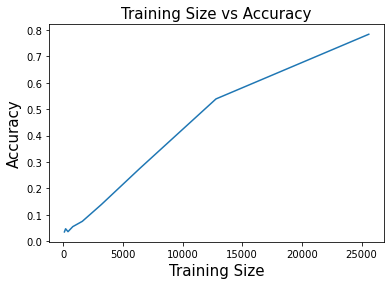

In [6]:
def Q3(train_sizes, accuracies):

### STUDENT START ###
    
    #creating a list
    train_time = [] 
    
    #iterating through train_sizes
    for i in train_sizes:
        #getting data from train_data and label based on train_size
        trn_train = train_data[:i] 
        trn_label = train_labels[:i] 
        
        #model building
        knn = KNeighborsClassifier(n_neighbors=1)
        #training on trn_data and trn_label
        knn.fit(trn_train, trn_label)
        
        #starting time
        start_time = time.time()
        
        #predicting on dev_data
        pred = knn.predict(dev_data) 
        
        #ending time
        end_time = time.time() 
        
        #taking the delta of time and append to a list
        difference = end_time - start_time 
        train_time.append(difference)
        
        #calculate accuracy
        accuracy_count = 0
        for j in range(pred.shape[0]):
            #if predicted label matches dev_label, add to accuracy count
            if pred[j] == dev_labels[j]: 
                accuracy_count += 1
            else:
                continue
        #calculate accuracies        
        accuracies.append(accuracy_count/pred.shape[0]) 
    
    #Print the report
    for i, v in enumerate(train_sizes):
        print("Train Size: " +  str(train_sizes[i]) + ", Accuracy: " 
              + str(accuracies[i]) + ", Train Time (secs): " + str(train_time[i]) )
    plt.plot(train_sizes, train_time)
    plt.xlabel("Training Size", fontsize = 15)
    plt.ylabel("Accuracy", fontsize = 15)
    plt.title("Training Size vs Accuracy", fontsize = 15)
    plt.show()
  
    

### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
accuracies = []
Q3(train_sizes, accuracies)

- I expected to see that as we increase the the training size more time would be needed because we have more data points. That is precisely what I see.
- I also expected accuracy to go up with more data points because the model would be able to train itself better. That is also what I see above. 

### Question 4: Evaluating if we should obtain additional data
---

In this question we wish to predict what accuracy we would get if we had additional training data.

Our input, our features and labels, are the output from the previous question. Based on the training size and accuracy we got in the previous question, we wish to predict the accuracy we would get if we had larger training sizes.

1. Produce a linear regression model that predicts accuracy of a 1-Nearest Neighbor model given training set size. 
1. Print $R^2$ of the linear regression model.  
1. Print the accuracies predicted for training set sizes 60000, 120000, and 1000000.  
1. Plot on a lineplot graph:
  1. the actual accuracies we obtained in the previous question 
  1. and the accuracies our model predicted we would have gotten.
  1. The X axis is the training set size. 
  1. You can limit the range of X and Y to the range where you have data for both plots. Meaning, in the this question, we want to visualize how good the prediction is.
1. What are two things that are wrong with our model?
1. Apply a transformation to the predictor features and a transformation to the outcome that make the predictions fix these issues. 
1. Show $R^2$ of the improved linear regression model.  
1. Print the accuracies predicted for training set sizes 60000, 120000, and 1000000.  
1. Plot a lineplot graph of both again as before.
  1. Be sure to plot this where the Y axis is accuracy and X axis is training set size, **not the transformed space**!
  1. Choose the range of X and Y to visualize effectively.

Notes:
* Train the linear regression models on all of the (transformed) accuracies estimated in Problem 3.
* Evaluate the linear regression models on all of the (transformed) accuracies estimated in Problem 3.
* You can use `LinearRegression` to produce a linear regression model.
* Remember that the sklearn `fit()` functions take an input matrix X and output vector Y. So, each input example in X is a vector, even if it contains only a single value.
* Hints:
  1. You have two problems here, how well your model fits and predicting *illogical* values of accuracy.
  1. You can look at:
    1. [logit](https://en.wikipedia.org/wiki/Logit): $\frac{1}{1 + e^{-x}} = \frac{e^x}{1+e^x}$ which takes numbers in $\[\infty,-\infty\]$ and outputs numbers in $(0, 1)$.
    1. [logistic](https://en.wikipedia.org/wiki/Logistic_function): $log(\frac{p}{1 - p})$ which takes numbers between $(0, 1)$ and outputs numbers between $\[\infty,-\infty\]$.
    1. It also happens that $x = logistic(p)$ is the same thing as $logit(x)=p$.

Accuracies for Training Set Sizes [60000, 120000, 1000000]: 

No Transformation Accuracies:
[[1.2361731707874237, 1.637428053637104, 7.522499668765751]]

𝑅2:0.4177006634161019



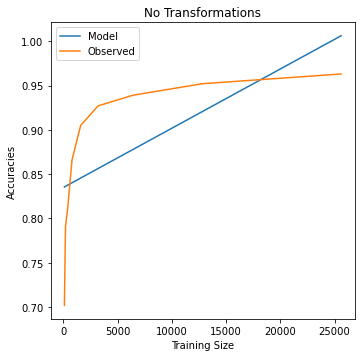

In [7]:
def Q4():

### STUDENT START ###
    #new larger train_size variables
    new_sizes = np.array([60000,120000,1000000]).reshape(-1,1)
    
    #changing format of the train_sizes data from question to for linear regression  
    x_sizes = np.array(train_sizes).reshape(-1,1)
    
     #accuracies of training sizes from question 3
    y_accuracies = np.array(accuracies).reshape(-1,1)
    
    #taking the log of training sizes from question 3
    x_logsizes = np.log(x_sizes)
    
    #taking the logs of new larger training sizes
    new_logsizes = np.log(new_sizes) 
    
    #initializing the size of subplots
    fig = plt.figure(figsize=(12, 12))
    

    #Graphing the model with no transformation 
    lm = LinearRegression(fit_intercept = True)
    lm.fit(x_sizes, y_accuracies)
    
    #predict accuracies of original training sizes
    lm_yhat = lm.predict(x_sizes)
    a1 = fig.add_subplot(2,2,1)
    a1.plot(x_sizes, lm_yhat, label="Model")
    plt.plot(x_sizes,accuracies,label="Observed")
    a1.set_xlabel('Training Size')
    a1.set_ylabel('Accuracies')
    a1.set_title('No Transformations')
    a1.legend()
    #predict accuracies of new training sizes
    no_transform_accuracies = lm.predict(new_sizes).reshape(1,-1).tolist()
    print("Accuracies for Training Set Sizes [60000, 120000, 1000000]: \n")
    print("No Transformation Accuracies:\n" + str(no_transform_accuracies) + "\n")
    print("𝑅2:" + str(lm.score(x_sizes,y_accuracies)) + "\n")

    
### STUDENT END ###

Q4()

Answer to part 5:  
- first thing that is wrong with our model is the that the model is underfitting the observed data
- second thing that is wrong for our model is that the accuracies are predicted accuracies for the larger data size is over 100%, which is not possible. 

Accuracies for Training Set Sizes [60000, 120000, 1000000]: 

No Transformation Accuracies:
[[1.2361731707874237, 1.637428053637104, 7.522499668765751]]

𝑅2:0.4177006634161019

Transform Input Accuracies:
[[1.0335879166434623], [1.0643212499767958], [1.1583312493537086]]

𝑅2:0.9068304252436642



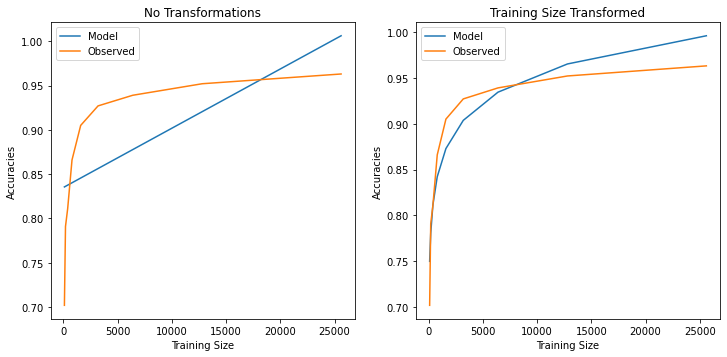

In [8]:
def Q4():

### STUDENT START ###
    #new larger train_size variables
    new_sizes = np.array([60000,120000,1000000]).reshape(-1,1)
    
    #changing format of the train_sizes data from question to for linear regression  
    x_sizes = np.array(train_sizes).reshape(-1,1)
    
     #accuracies of training sizes from question 3
    y_accuracies = np.array(accuracies).reshape(-1,1)
    
    #taking the log of training sizes from question 3
    x_logsizes = np.log(x_sizes)
    
    #taking the logs of new larger training sizes
    new_logsizes = np.log(new_sizes)
    
    #initializing the size of subplots
    fig = plt.figure(figsize=(12, 12))
    

    #Graphing the model with no transformation 
    lm = LinearRegression(fit_intercept = True)
    lm.fit(x_sizes, y_accuracies)
    
    #predict accuracies of original training sizes
    lm_yhat = lm.predict(x_sizes)
    a1 = fig.add_subplot(2,2,1)
    a1.plot(x_sizes, lm_yhat, label="Model")
    plt.plot(x_sizes,accuracies,label="Observed")
    a1.set_xlabel('Training Size')
    a1.set_ylabel('Accuracies')
    a1.set_title('No Transformations')
    a1.legend()
    
    #predict accuracies of new training sizes
    no_transform_accuracies = lm.predict(new_sizes).reshape(1,-1).tolist()
    print("Accuracies for Training Set Sizes [60000, 120000, 1000000]: \n")
    print("No Transformation Accuracies:\n" + str(no_transform_accuracies) + "\n")
    print("𝑅2:" + str(lm.score(x_sizes,y_accuracies)) + "\n")
    
    
    #Graphing the model with log transformation
    lm2 = LinearRegression(fit_intercept = True)
    lm2.fit(x_logsizes,y_accuracies)
    #predict accuracies of original training sizes
    lm2_yhat = lm2.predict(x_logsizes)
    a2 = fig.add_subplot(2,2,2)
    a2.plot(x_sizes,lm2_yhat, label="Model")
    a2.plot(x_sizes,y_accuracies, label="Observed")
    a2.set_xlabel('Training Size')
    a2.set_ylabel('Accuracies')
    a2.set_title('Training Size Transformed')
    a2.legend()
    
    #predict accuracies of new training sizes
    transform_input_accuracies = lm2.predict(new_logsizes) 
    print("Transform Input Accuracies:\n" + str(transform_input_accuracies.tolist()) + "\n")
    print("𝑅2:" + str(lm2.score(x_logsizes,y_accuracies)) + "\n") 
    

    
### STUDENT END ###

Q4()

As we can see, the model has improved quite a bit and the R2 has also improved. We would need to transform our model more to get a better fit. 

Accuracies for Training Set Sizes [60000, 120000, 1000000]: 

No Transformation Accuracies:
[[1.2361731707874237, 1.637428053637104, 7.522499668765751]]

𝑅2:0.4177006634161019

Transform Input Accuracies:
[[1.0335879166434623], [1.0643212499767958], [1.1583312493537086]]

𝑅2:0.9068304252436642

Transform Both Accuracies:
[0.9630701660900399, 0.9665919573218424, 0.9741365674202281]

𝑅2:0.9395242859897991



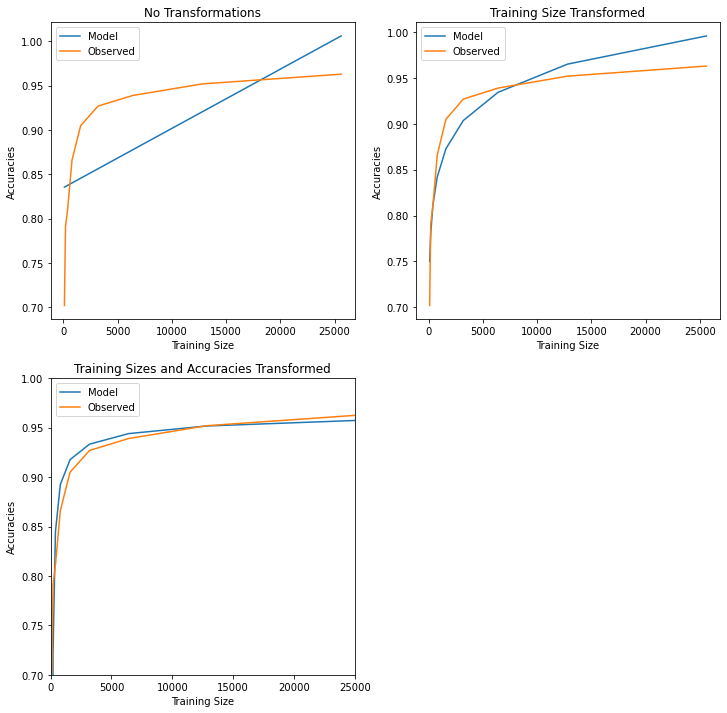

In [9]:
def Q4():

### STUDENT START ###
    #new larger train_size variables
    new_sizes = np.array([60000,120000,1000000]).reshape(-1,1)
    
    #changing format of the train_sizes data from question to for linear regression  
    x_sizes = np.array(train_sizes).reshape(-1,1)
    
    #accuracies of training sizes from question 3
    y_accuracies = np.array(accuracies).reshape(-1,1)
    
    #taking the log of training sizes from question 3
    x_logsizes = np.log(x_sizes)
    
    #transforming accuracies based on the given formula in the question 
    log_accuracy = lambda x: x/(1.0 - x) 
    transformed_accuracy = np.array(list(map(log_accuracy,accuracies)))
    
    logit_transformation = lambda x:x/(1.0+x) #converts odds to probabilities
    
    
    #taking the logs of new larger training sizes
    new_logsizes = np.log(new_sizes)
    
    #initializing the size of subplots
    fig = plt.figure(figsize=(12, 12))
    

    #Graphing the model with no transformation 
    lm = LinearRegression(fit_intercept = True)
    lm.fit(x_sizes, y_accuracies)
    
    #predict accuracies of original training sizes
    lm_yhat = lm.predict(x_sizes)
    a1 = fig.add_subplot(2,2,1)
    a1.plot(x_sizes, lm_yhat, label="Model")
    plt.plot(x_sizes,accuracies,label="Observed")
    a1.set_xlabel('Training Size')
    a1.set_ylabel('Accuracies')
    a1.set_title('No Transformations')
    a1.legend()
    
    #predict accuracies of new training sizes
    no_transform_accuracies = lm.predict(new_sizes).reshape(1,-1).tolist()
    print("Accuracies for Training Set Sizes [60000, 120000, 1000000]: \n")
    print("No Transformation Accuracies:\n" + str(no_transform_accuracies) + "\n")
    print("𝑅2:" + str(lm.score(x_sizes,y_accuracies)) + "\n")
    
    
    #Graphing the model with log transformation
    lm2 = LinearRegression(fit_intercept = True)
    lm2.fit(x_logsizes,y_accuracies)
    #predict accuracies of original training sizes
    lm2_yhat = lm2.predict(x_logsizes)
    a2 = fig.add_subplot(2,2,2)
    a2.plot(x_sizes,lm2_yhat, label="Model")
    a2.plot(x_sizes,y_accuracies, label="Observed")
    a2.set_xlabel('Training Size')
    a2.set_ylabel('Accuracies')
    a2.set_title('Training Size Transformed')
    a2.legend()
    
    #predict accuracies of new training sizes
    transform_input_accuracies = lm2.predict(new_logsizes) 
    print("Transform Input Accuracies:\n" + str(transform_input_accuracies.tolist()) + "\n")
    print("𝑅2:" + str(lm2.score(x_logsizes,y_accuracies)) + "\n") 
    
    
    lm3 = LinearRegression(fit_intercept = True)
    lm3.fit(x_logsizes, transformed_accuracy)
    #predict accuracies of original training sizes
    lm3_yhat = lm3.predict(x_logsizes)
    
    #convert predicted accuracies to probabilities
    lm3_probabilities = list(map(logit_transformation,lm3_yhat)) 
    a3 = fig.add_subplot(2,2,3)
    a3.plot(x_sizes,lm3_probabilities, label="Model")
    a3.plot(x_sizes,y_accuracies, label="Observed")
    a3.set_xlabel('Training Size')
    a3.set_ylabel('Accuracies')
    a3.set_title('Training Sizes and Accuracies Transformed')
    a3.set_xlim([0,25000])
    a3.set_ylim([0.7,1])
    a3.legend()
    
    #predict accuracies of new training sizes
    transform_both = lm3.predict(new_logsizes)
    probability_both = list(map(logit_transformation,transform_both))
    print("Transform Both Accuracies:\n" + str(probability_both) +"\n")
    print("𝑅2:" + str(lm3.score(x_logsizes,transformed_accuracy)) + "\n")

    
### STUDENT END ###

Q4()

Model has improved even more. R2 is almost at 94%, predicted accuraciies are no longer non-sensible and above 100%. 

### Question 5: Getting to know the confusion matrix.
---

1. Produce a 1-Nearest Neighbor model.
1. Show the confusion matrix. 
1. Which digit does the model most often confuse with which digit? (*for example, the model most often mistakes the digit $1$ as the digit $7$*).
1. Show examples of the misclassified digit.

Notes:
- Train on the mini train set.
- Evaluate performance on the dev set.
- You can use `confusion_matrix()` to produce a confusion matrix.
- No need to calculate the "most confused digits" programmatically.

In [10]:

def Q5():

### STUDENT START ###
    
    #building the model, training it on mini data set and then testing it on dev_data 
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(mini_train_data, mini_train_labels)
    y_pred = knn.predict(dev_data)
    y_test = dev_labels
    
    #creating confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(conf_matrix)
    
    

### STUDENT END ###

Q5()


[[101   0   1   0   0   0   1   1   2   0]
 [  0 116   1   0   0   0   0   0   1   0]
 [  1   4  84   2   2   0   2   4   6   1]
 [  0   2   0  84   0   6   0   2   3   0]
 [  0   0   1   0  78   0   0   2   0  11]
 [  2   0   0   1   1  77   5   0   2   0]
 [  1   2   1   0   1   2  94   0   1   0]
 [  0   1   1   0   0   0   0  96   0   4]
 [  1   5   4   3   1   3   0   1  72   4]
 [  0   1   0   0   3   2   0   7   0  82]]


Answer to part 3: Looks like digit 8 is the most misclassified digit, the second most misclassified digit is 5 


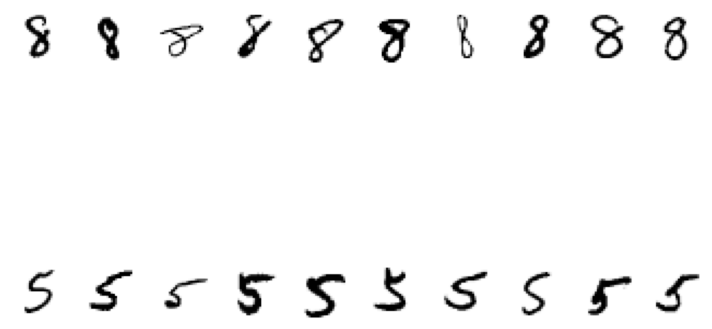

In [11]:
#examples of misclassfied digits 8 and 5. 

#filter to get most confused digits
confuse_digits = np.array(['8','5']) 

#creating the plot. 
fig, axes = plt.subplots(2,10,figsize = (10,10))
plt.rc("image",cmap="Greys")
for i, digit in enumerate(confuse_digits):
    for j in range(10):
        image = dev_data[dev_labels == digit][j].reshape((28,28))
        axes[i,j].imshow(image)
        axes[i,j].axis("off")
plt.tight_layout()
plt.show()

    